# Sleep Disorder Pridiction

### Import the libraries

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

### Import the dataset using pandas

In [13]:
data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [14]:
data.shape

(374, 13)

In [15]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [17]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


### Handling Missing Values

In [18]:
data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

If we observe the above senario we see that the sleep Disorder is showing 219 missing values but they are actually meant for saying there is no disoder 
- So we are going to replace this value with "No Disorder"

In [19]:
data["Sleep Disorder"] = data["Sleep Disorder"].replace({None: "No Disorder"})
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [20]:
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

### Removing the Person Id column 

as the person id does not contribute to the target Sleep Disorder

In [23]:
data.drop(['Person ID'],axis=1, inplace= True)
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Outlier Analysis

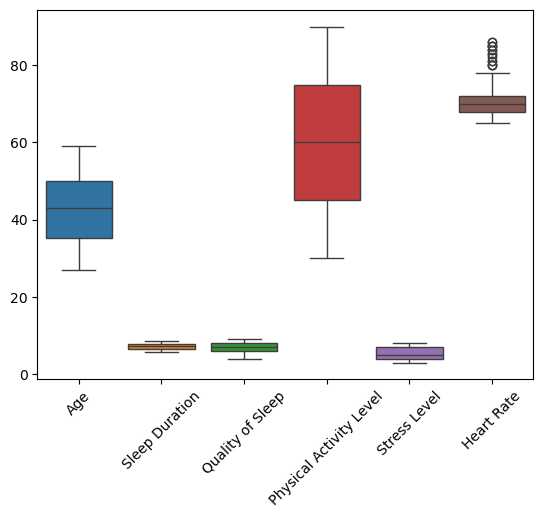

In [28]:
sns.boxplot(data=data[['Age','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level','Heart Rate']])
plt.xticks(rotation=45)
plt.show()

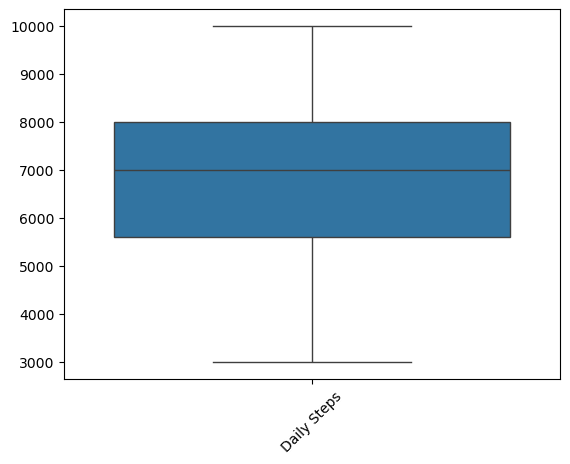

In [29]:
sns.boxplot(data=data[['Daily Steps']])
plt.xticks(rotation=45)
plt.show()

As from the above we have some values of ouliers from Heart rate but we are keeping them to analise the sleep disorder.

### Encoding all the categorical columns

### Exploratory Data Analysis

#### Univariate Analysis

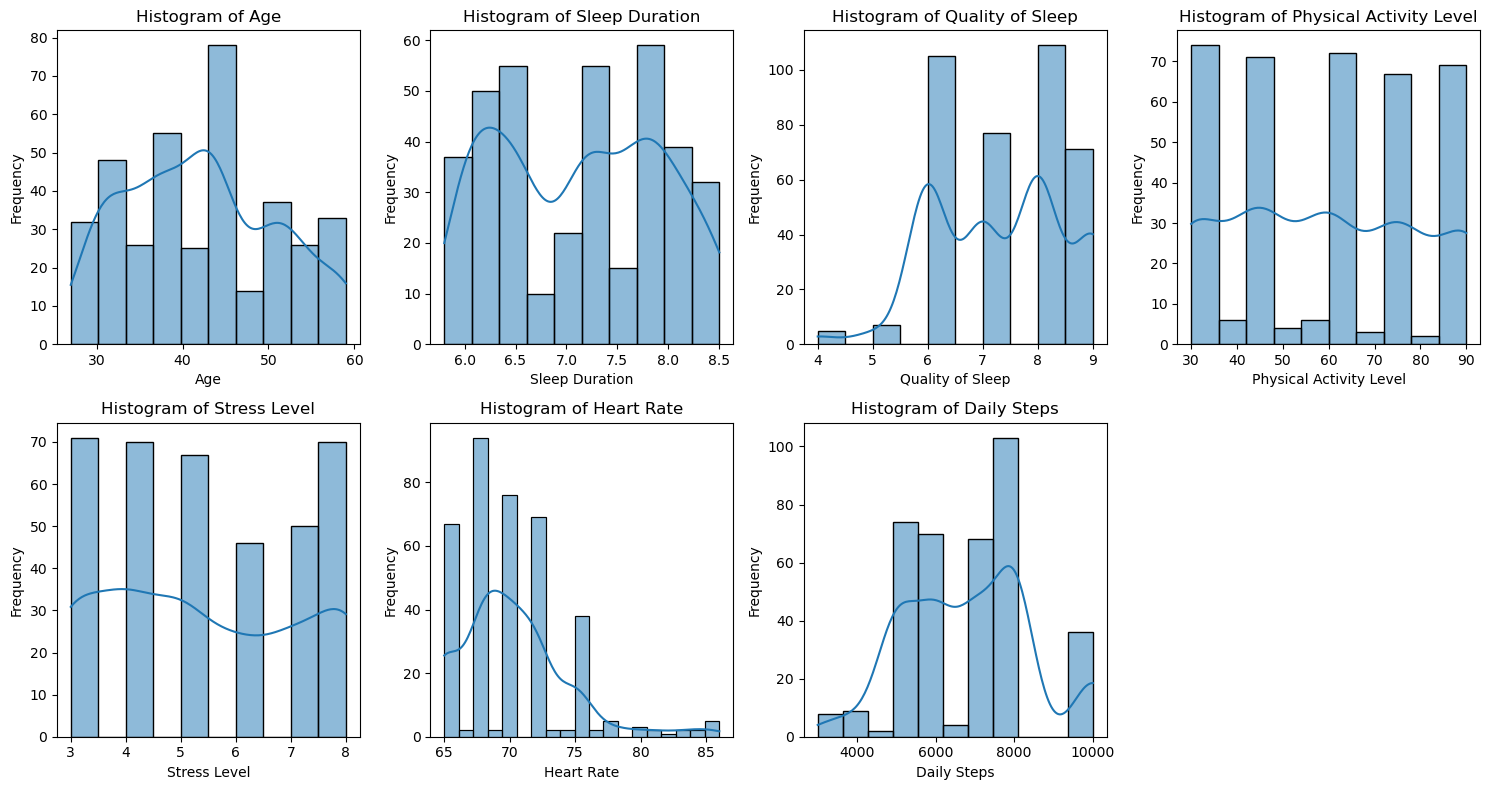

In [30]:
import math

# Select numeric columns from the dataset
numeric_columns = data.select_dtypes(include='number').columns

# Calculate the number of rows needed based on the number of columns
n_cols = 4
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Set up the subplot grid with 3 columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 4))

# Flatten axes in case it's a 2D array
axes = axes.flatten()

# Create a histogram for each numeric column
for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], ax=axes[i], kde=True)  # Plot with KDE curve
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots, if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### Bivariate Analysis

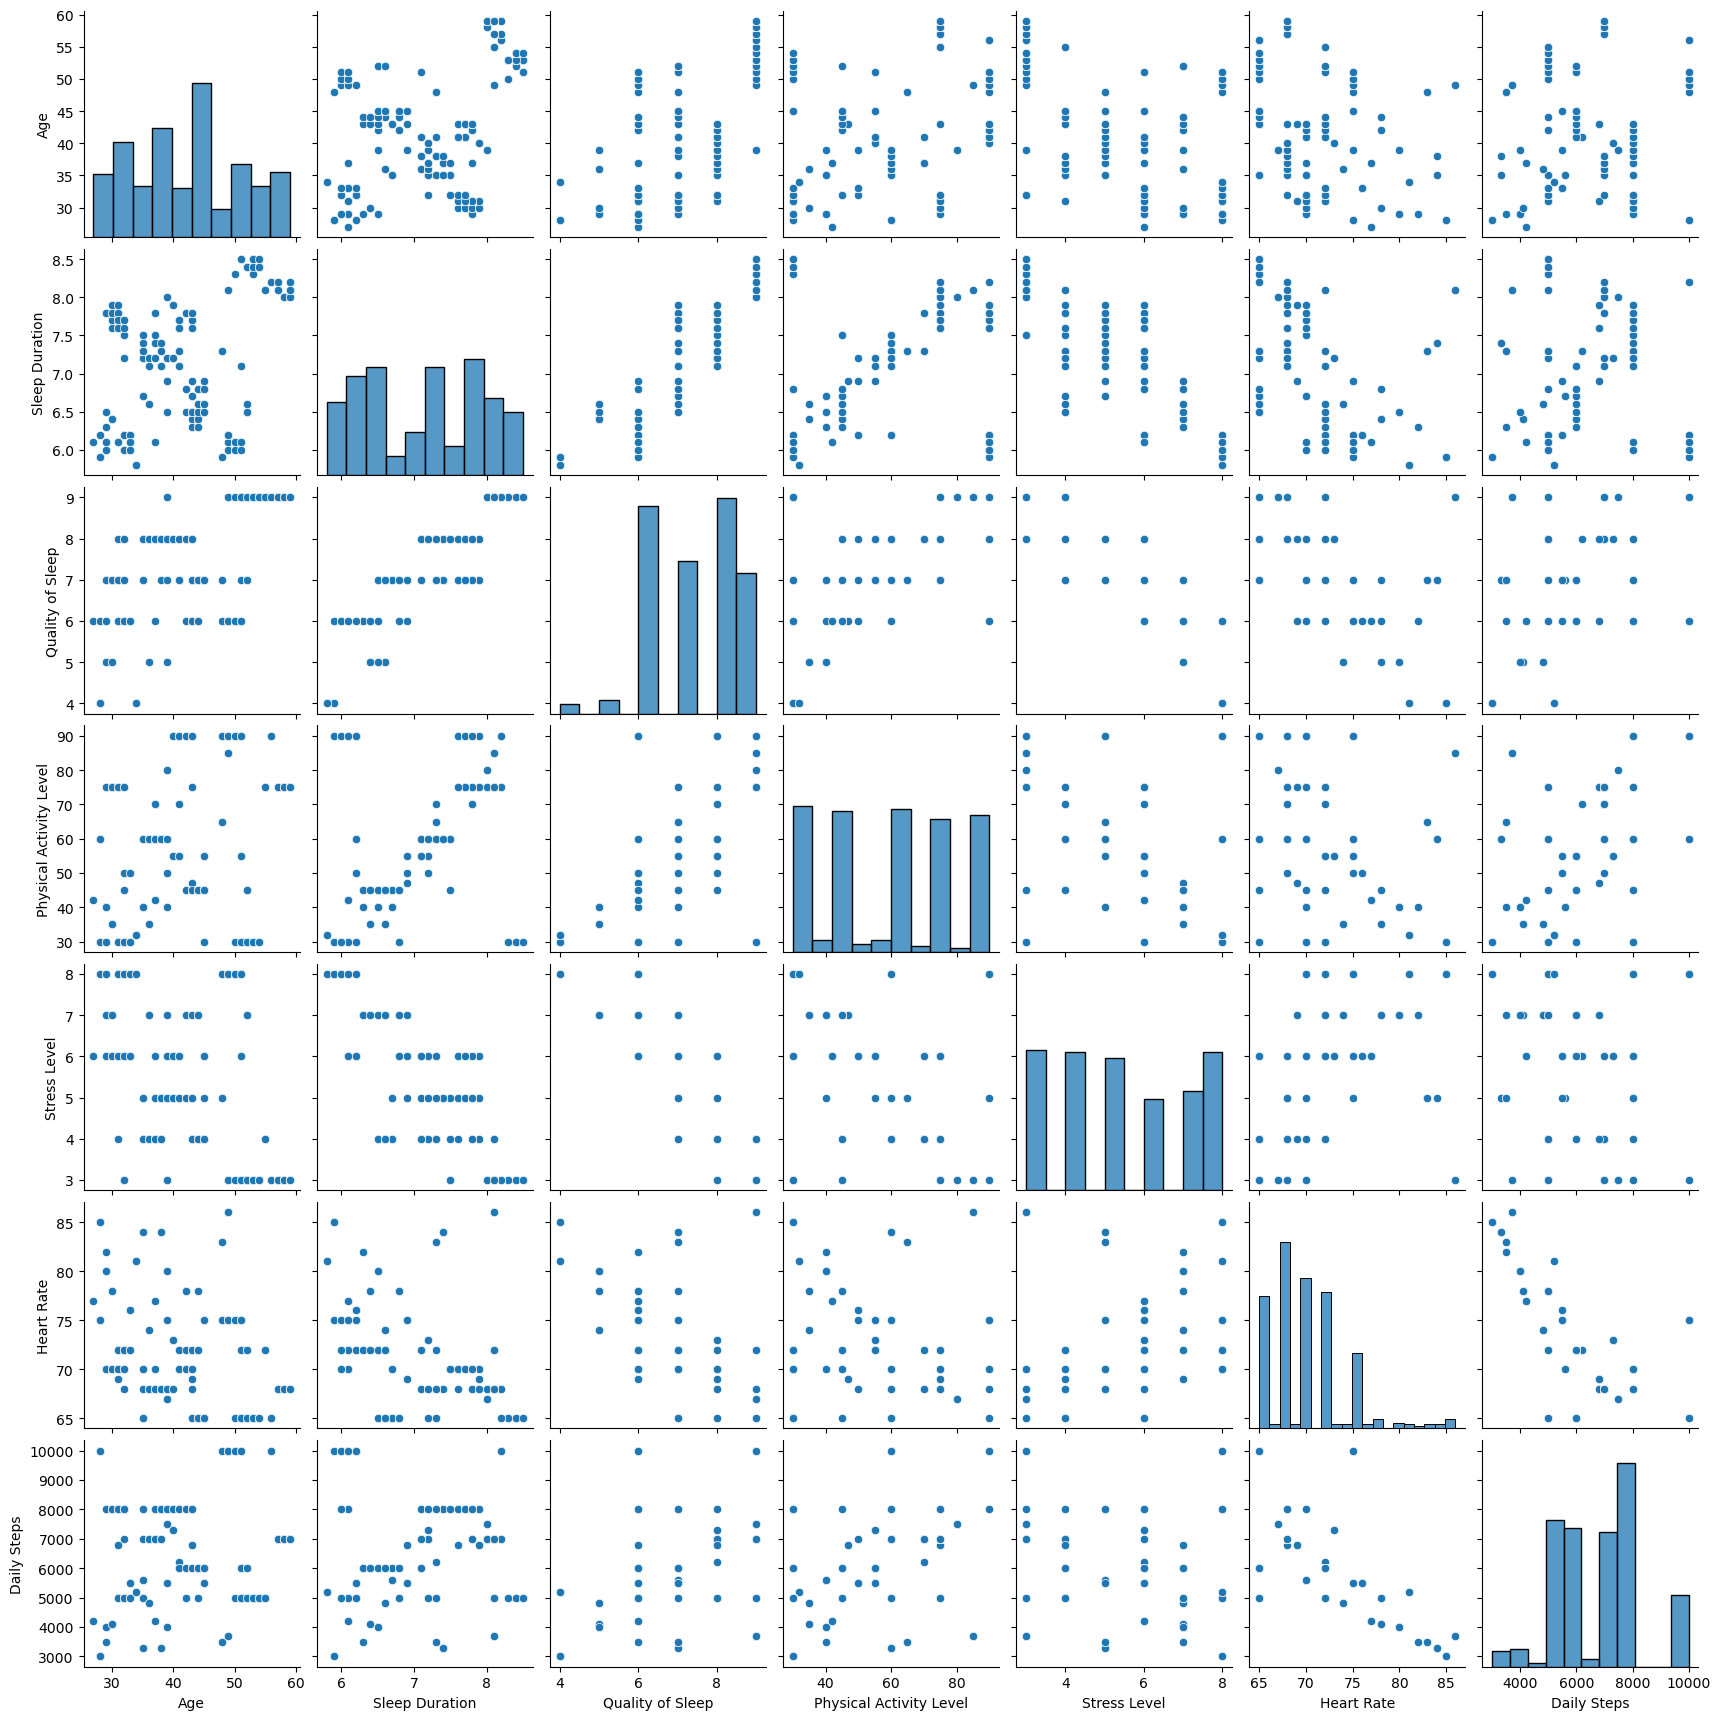

In [31]:
sns.pairplot(data)
plt.show()

### Encoding the Sleep Disorder Column values

In [32]:
data["Sleep Disorder"] = data["Sleep Disorder"].map({'No Disorder': 0, 'Insomnia':1, 'Sleep Apnea': 2})
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,2
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,2


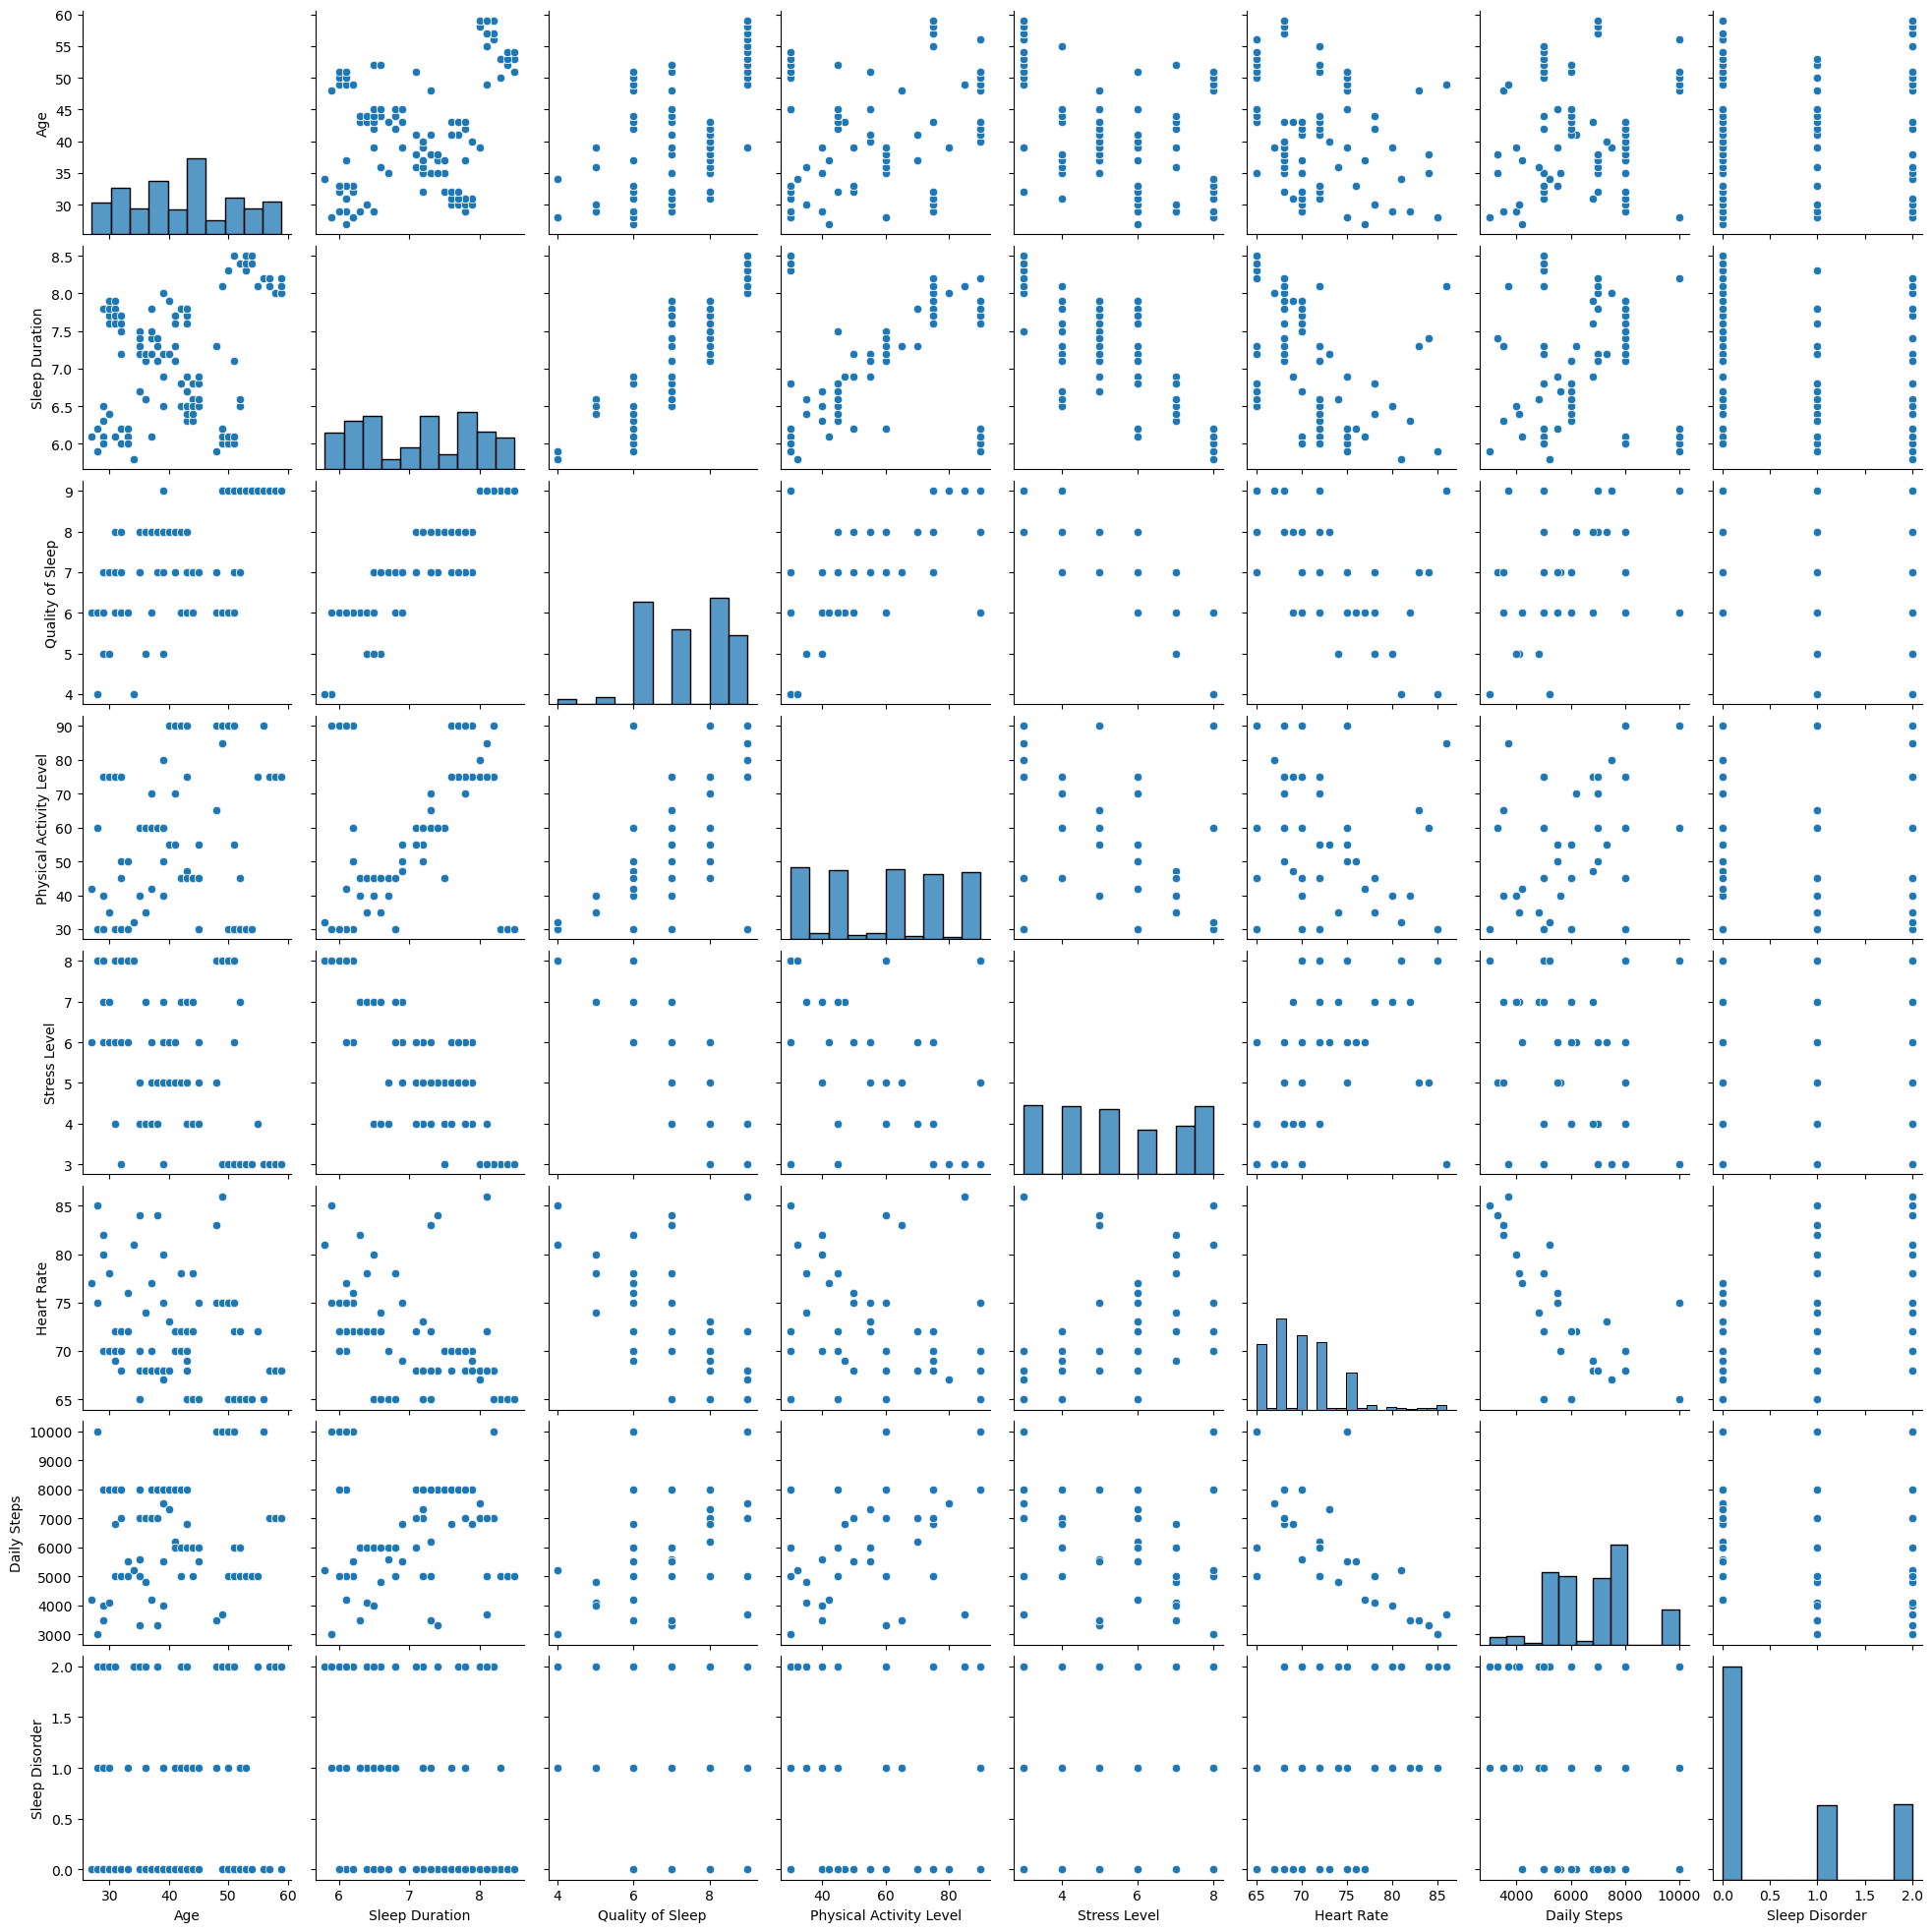

In [33]:
sns.pairplot(data)
plt.show()

### Correlation

In [34]:
from matplotlib.colors import LinearSegmentedColormap

correl = data.corr()

plt.figure(figsize= (14,4))

# Define a custom single-color colormap
single_color_cmap = LinearSegmentedColormap.from_list("single_color", ["white", "skyblue"])

# Plot the heatmap with the custom colormap
sns.heatmap(correl, cmap=single_color_cmap, annot=True)
plt.show()

ValueError: could not convert string to float: 'Male'

### Standardising the values